# Control 1: Sintaxis básica y manipulación de objetos simples en R


Nombre 1: _Puede incluir su nombre acá haciendo doble click_                                                                                                                                      <br>
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embargo, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día domingo **09 de noviembre** 23:59 hrs para hacer envío de sus respuestas.

Una vez finalizado el desarrollo del control, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Control1_nombres_integrantes.ipynb`.

 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control1_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo rumorale1@gmail.com con el asunto "DBDC-R-C1: 'nombre y apellido de los integrantes' "

**NOTA**:
   * Los correos cuyo asunto no comiencen con "DBDC-R-C1" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:05 hrs del lunes 10 de noviembre, su nota máxima será un 6.0.

## Datos Flights


En este control trabajaremos con el conjunto de datos flights, perteneciente al paquete nycflights13, el cual contiene información detallada de todos los vuelos que despegaron desde Nueva York (aeropuertos JFK, LGA y EWR) durante el año 2013.

Este dataset es ideal para ejercitar los conceptos vistos en clases, porque reúne una amplia variedad de variables numéricas, categóricas y temporales, lo que nos permite practicar desde operaciones básicas con vectores y matrices, hasta análisis más complejos con dplyr.

Fuente: Datos públicos del Bureau of Transportation Statistics (EE. UU.)



#### Descripción de variables


|Variable | Descripción|
|---|---|
| year |Año del vuelo (2013). Incluido para consistencia temporal en posibles fusiones con otros datasets.|
|month| Mes del vuelo (0–12). Permite agrupar o analizar estacionalidad.|
|day| Día del mes (1–31). Junto con month y year define la fecha exacta del vuelo.|
|dep_time| Hora real de despegue en formato HHMM (por ejemplo, 517 = 5:17 AM). Puede tener valores NA si el vuelo fue cancelado.|
|sched_dep_time| Hora programada de salida (en formato HHMM). Permite calcular el atraso en salida (dep_delay).|
|dep_delay| Atraso en salida en minutos. Es la diferencia entre la hora real (dep_time) y la programada (sched_dep_time). Valores positivos = atraso; negativos = salida anticipada.|
|arr_time| Hora real de llegada (formato HHMM). Puede ser NA si el vuelo fue cancelado.|
|sched_arr_time| Hora programada de llegada (formato HHMM). Permite calcular arr_delay.|
|arr_delay| Atraso en llegada en minutos. Calculado como la diferencia entre arr_time y sched_arr_time ajustada por el cambio de día. Valores negativos indican llegada anticipada.|
|carrier| Código de dos letras de la aerolínea (ejemplo: UA, AA, DL). Puede vincularse a airlines para obtener el nombre completo.|
|flight| Número del vuelo dentro de la aerolínea (carrier).|
|tailnum| Número de registro del avión (matrícula). Permite vincular con la tabla planes.|
|origin| Aeropuerto de origen|
| dest |  Código del aeropuerto de destino (IATA). Puede vincularse con la tabla airports para obtener nombre y ubicación. |
| air_time | Duración real del vuelo en minutos (tiempo en el aire). Puede tener NA si el vuelo fue cancelado o faltan datos. |
| distance | Distancia en millas entre el aeropuerto de origen y el de destino. |
| hour | Hora programada de salida redondeada a la hora completa. Se obtiene de sched_dep_time. |
| minute | Minuto programado de salida (complemento de hour). |
| time_hour | Fecha y hora combinadas (year, month, day, hour) usadas para unir con otras tablas (como weather). Es útil para análisis temporales. |




### Pregunta 0

**a) 1pt** Cargue el archivo `fligths.csv`

**b) 1pt** ¿Cuantas observaciones contiene este conjunto de datos?

**c) 1pt** ¿Cuantas variables contiene?

**d) 2pt** Tal cual cargó la data, ¿Cuántas variables de tipo numérico hay? ¿Cuántas de tipo carácter?



In [8]:
library(dplyr)

#a
vuelos <- read.csv('flights.csv')

#b
nrow(vuelos)

#c
ncol(vuelos)

#d -> basta contar usando siguiente comando
str(vuelos)



[1] 336776

[1] 19

'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : int  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : int  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : int  227 227 160 183 116 150 158 53 140 138 ...
 $ distance      : int  1400 1416 1089

## Manejo vectores, matrices y listas

### Pregunta 1

**a) 1pt** Crea la variable `v_dist` con los **primeros 20** registros de la variable `distance`.   

**b) 5pts** Accede al primer y último elemento; posiciones 1, 3, 5; todos excepto el 2; y los elementos `> 1500`.  

**c) 3pts** Entrega promedio, mediana y proporción `> 1500`.


In [9]:
# P1
## Respuesta
#a
v_dist <- vuelos$distance[1:20]
v_dist

#b
v_dist[c(1, length(v_dist))]
v_dist[c(1,3,5)]
v_dist[-2]
v_dist[v_dist > 1500]

#c
mean(v_dist)
median(v_dist)
length(v_dist[v_dist > 1500])/length(v_dist)*100



[1] 1400 1416 1089 1576  762  719 1065  229  944  733 1028 1005 2475 2565 1389
[16]  187 2227 1076  762 1023

[1] 1400 1023

[1] 1400 1089  762

[1] 1400 1089 1576  762  719 1065  229  944  733 1028 1005 2475 2565 1389  187
[16] 2227 1076  762 1023

[1] 1576 2475 2565 2227

[1] 1183.5

[1] 1046.5

[1] 20

### Pregunta 2

**a) 2pts** Crea una matriz llamada `m_small`, de dimensiones (8×3) usando los primeros 8 registros de las variables `dep_delay`, `arr_delay`, `distance`.  

**b) 3pts** Muestra `dim`, `nrow`, `ncol`.  

**c) 4pts** Accede a: fila 1, columna 3, elemento [2,1], y filas con `distance > 1000`.


In [10]:
#respuesta
#a
m_small <- cbind(vuelos$dep_delay[1:8], vuelos$arr_delay[1:8], vuelos$distance[1:8])
m_small
#b
dim(m_small); nrow(m_small); ncol(m_small)

#c
m_small[1,]; m_small[,3]; m_small[2,1]; m_small[m_small[,3] > 1000,]

2,11,1400
4,20,1416
2,33,1089
-1,-18,1576
-6,-25,762
-4,12,719
-5,19,1065
-3,-14,229


[1] 8 3

[1] 8

[1] 3

[1]    2   11 1400

[1] 1400 1416 1089 1576  762  719 1065  229

[1] 4

2,11,1400
4,20,1416
2,33,1089
-1,-18,1576
-5,19,1065


## Data Analytics en Acción

Imagina que formas parte del equipo de Data Analytics de una compañía aérea que opera vuelos desde los aeropuertos de Nueva York —John F. Kennedy (JFK), LaGuardia (LGA) y Newark (EWR)—.
Tu equipo tiene la misión de monitorear el desempeño operacional de los vuelos, identificar patrones de atraso, y generar informes ejecutivos que ayuden a mejorar la eficiencia y puntualidad de la operación.

### Pregunta 3 - KPIs

Cada mañana la gerencia pide los siguientes indicadores (kpis) para vuelos **desde JFK**:

|KPI	|Descripción	|
|---|---|
|mean_dep_delay	|Promedio de atraso en salida|
|median_dep_delay	|Mediana del atraso en salida|
|p90_dep_delay	|Percentil 90 del atraso en salida (10% más atrasados) *Pista: `quantile(dep_delay, 0.9, na.rm = TRUE)*|
|mean_arr_delay	|Promedio de atraso en llegada|
|pct_on_time	|Porcentaje de vuelos sin atraso (arr_delay <= 0)|
|avg_air_time	|Promedio de tiempo de vuelo (en minutos)|
|avg_distance	|Promedio de distancia volada (en millas)|


**a) 8pts** Usando el **dataset completo**, entregue estos indicadores en una lista llamada `kpis`. No olvide eliminar los valores `NA` usando `na.rm = T`

**b) 4pts** Comente sobre cada indicador




In [11]:
vuelos_jfk          <- vuelos[vuelos$origin == 'JFK',]
mean_dep_delay      <- mean(vuelos_jfk$dep_delay, na.rm = T)
median_dep_delay    <- median(vuelos_jfk$dep_delay, na.rm = T)
p90_dep_delay       <- quantile(vuelos_jfk$dep_delay,probs = 0.9, na.rm = T)
mean_arr_delay      <- mean(vuelos_jfk$arr_delay, na.rm = T)
pct_on_time         <- length(vuelos_jfk$arr_delay[ vuelos_jfk$arr_delay<=0])/length(vuelos_jfk$arr_delay)*100
avg_air_time        <- mean(vuelos_jfk$air_time, na.rm = T)
avg_distance        <- mean(vuelos_jfk$distance, na.rm = T)


kpis <- list(mean_dep_delay = mean_dep_delay,
             median_dep_delay = median_dep_delay,
             p90_dep_delay = p90_dep_delay,
             mean_arr_delay = mean_arr_delay,
             pct_on_time = pct_on_time,
             avg_air_time = avg_air_time,
             avg_distance = avg_distance)

kpis

$mean_dep_delay
[1] 12.11216

$median_dep_delay
[1] -1

$p90_dep_delay
90% 
 46 

$mean_arr_delay
[1] 5.551481

$pct_on_time
[1] 61.46173

$avg_air_time
[1] 178.349

$avg_distance
[1] 1266.249

### Pregunta 4 - Peak matinal


**a) 2pts** Genere una variable llamada `vuelos_dep_atraso_lga` que contenga todos los vuelos **desde LGA** con salida programada en el horario **06:00–09:59** y que tienen **atraso de salida**

**b) 2pts** Usando `vuelos_dep_atraso_lga` ¿Cuáles son las tres aerolíneas (`carrier`) con mayor atraso de salida promedio?

**c) 2pts** Usando `vuelos_dep_atraso_lga` ¿Qué porcentaje de estos llega con **atraso a destino**?

**d) 4pts** Usando `vuelos_dep_atraso_lga` ¿Cuál es el mes del año en que se produce el mayor **atraso de salida** promedio? ¿y el menor?

**e) 2pts** Usando ``, genere dos nuevas variables:
* `gain = arr_delay - dep_delay`
* `speed_mph = distance / (air_time/60)`.  

    Grafique usando `plot(gain, speed_mph)`. Comente





[1] 336776     19

[1] 5612   19

carrier,mean_dep_delay
<chr>,<dbl>
F9,45.70270
EV,45.47656
9E,44.72067


[1] 67.47895

month,mean_dep_delay
<int>,<dbl>
7,34.55746
6,31.79588
4,31.66898
3,30.33006
9,28.99690
12,28.04545
1,27.67873
5,26.77590
2,26.66939


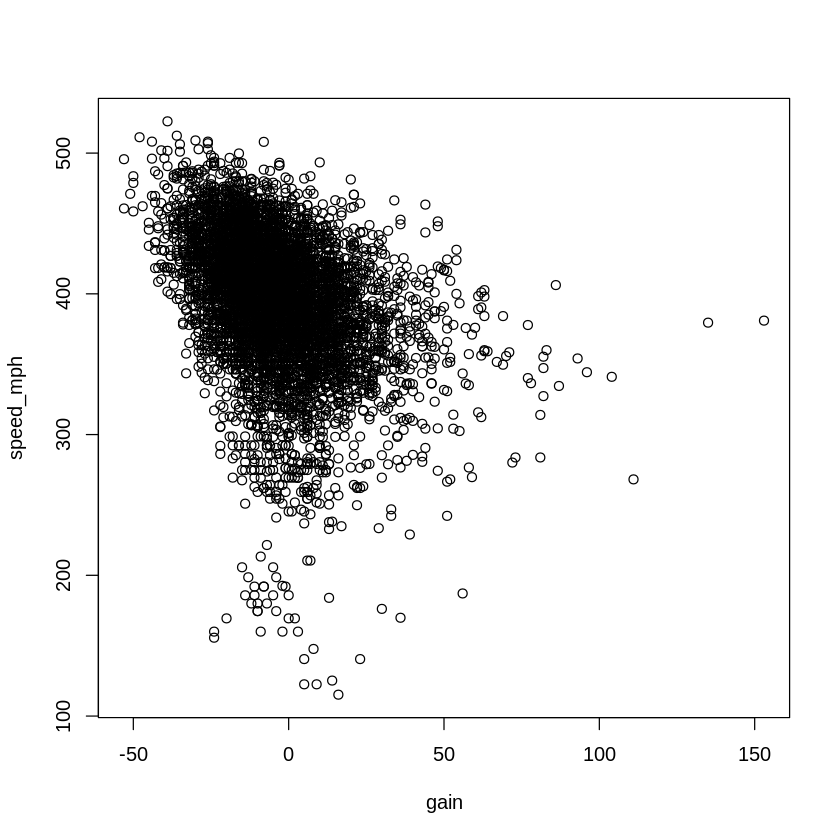

In [12]:
#a
vuelos_dep_atraso_lga <- vuelos %>%
filter(origin == 'LGA', sched_dep_time >= 600, sched_dep_time <= 959, dep_delay > 0)
dim(vuelos)
dim(vuelos_dep_atraso_lga)
#b
vuelos_dep_atraso_lga %>%
group_by(carrier) %>%
summarise(mean_dep_delay = mean(dep_delay, na.rm = T))%>%
ungroup() %>%
arrange(desc(mean_dep_delay)) %>% head(3)

#c
vuelos_dep_atraso_lga_sin_na = vuelos_dep_atraso_lga %>% filter(!is.na(arr_delay))
length(vuelos_dep_atraso_lga_sin_na$arr_delay[vuelos_dep_atraso_lga_sin_na$arr_delay > 0])/length(vuelos_dep_atraso_lga_sin_na$arr_delay)*100

# d
vuelos_dep_atraso_lga %>%
  group_by(month) %>%
    summarise(mean_dep_delay = mean(dep_delay,na.rm = T)) %>%
ungroup() %>%
arrange(desc(mean_dep_delay))

#e
gain = vuelos_dep_atraso_lga$arr_delay - vuelos_dep_atraso_lga$dep_delay
speed_mph = vuelos_dep_atraso_lga$distance / (vuelos_dep_atraso_lga$air_time/60)
plot(gain, speed_mph)


### Pregunta 5 - Cancelaciones

Asuma que un vuelo cancelado se detecta en los datos cuando `ep_delay` toma el valor `NA`.

**a) 2pts** Genere un nuevo dataframe que contenga todos los vuelos cancelados

**b) 2pts** Seleccione los 10 destinos (`dest`).

**c) 3pts** ¿Qué aerolínea tiene más vuelos cancelados en verano (Junio, Julio, Agosto)?


In [21]:
#a
vuelos_cancelados <- vuelos %>% filter(is.na(dep_delay))

#b
vuelos_cancelados %>% count(dest) %>% arrange(desc(n)) %>% head(10)
#c

vuelos_cancelados %>% filter(month %in% c(6, 7, 8)) %>% count(carrier) %>% arrange(desc(n)) %>% head(1)





,dest,n
,<chr>,<int>
1,ORD,641
2,DCA,548
3,BOS,459
4,RDU,367
5,CLT,366
6,DTW,324
7,ATL,317
8,IAD,309
9,DFW,275


,carrier,n
,<chr>,<int>
1,EV,859
